# Unloading Manuscript
## Figures 7 and 8 
* Updated Analysis Random Forest Read - PDPs
* Loading only the random forest model (from rerun) and taking a look at it without reruning anything

created by Cassie Lumbrazo\
date: Nov 2025, edited Jan 2026\
python environment: **randomforest**

latest: running on UAS linux machine


## Load Everything

In [3]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr

import copy 
import pickle
import sklearn

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

So, I reran everything in the `Updated_Analysis_Random_Forest_Run.ipynb` notebook.\
Now, everything works with python 3.13.2 and I created new `joblib` and `pkl` files.

In [5]:
from joblib import dump
from joblib import load

filepath = '/home/cassie/data/unloading_regimes_analysis/'
# model_joblib = load(filepath + 'updated_analysis_random_forest_model_int_20_1000_flip.joblib') # load the random forest model
model = load(filepath + 'updated_analysis_random_forest_model_int_20_1000_flip.joblib') # load the random forest model

In [6]:
model

RandomForestClassifier(max_depth=3, n_estimators=1000, n_jobs=15)

Also can load the new pickle file now that the it works with the new python environment and such, 

In [7]:
# model_pickle = pickle.load(open(filepath + 'updated_analysis_random_forest_model_int_20_1000_flip.pkl', 'rb')) # rb, reading
# model_pickle

In [8]:
df = pd.read_csv(filepath + 'updated_analysis_random_forest_model_int_20_1000_results_with_metdata.csv')
df

,Unnamed: 0,shortwave,windspeed,temp,CD,Classification,site,model
0,0,4.930000,1.180000,-3.495000,1.0,Snow Staying,niwot,1
1,1,29.430000,1.735000,-3.325000,1.0,Snow Staying,niwot,1
2,2,124.500000,2.080000,-2.430000,1.0,Snow Staying,niwot,1
3,3,102.040000,2.745000,-3.250000,1.0,Snow Staying,niwot,1
4,4,614.380000,4.595000,-3.350000,1.0,Snow Staying,niwot,0
...,...,...,...,...,...,...,...,...
1645,1645,400.306250,0.770125,2.143021,1.0,Snow Staying,laret,0
1646,1646,605.846250,0.973554,3.865325,1.0,Snow Staying,laret,0
1647,1647,854.292500,1.648042,4.049008,0.0,Snow Unloading,laret,0
1648,1648,902.823333,1.427383,4.768171,0.0,Snow Unloading,laret,0


In [9]:
# load the features used in the model
local_path='/home/cassie/data/unloading_regimes_analysis/'
X_features = pd.read_csv(local_path + "X_randomforestmodel_features.csv")
y_features = pd.read_csv(local_path + "y_randomforestmodel_features.csv")

In [10]:
X_features

,shortwave radiation (W/m2),wind speed (m/s),air temperature (C)
0,4,1,-3
1,29,1,-3
2,124,2,-2
3,102,2,-3
4,614,4,-3
...,...,...,...
1645,400,0,2
1646,605,0,3
1647,854,1,4
1648,902,1,4


In [11]:
print(X_features.shape)

(1650, 3)


In [12]:
print("Shape of X_features:", X_features.shape)
print("Columns:", X_features.columns)

Shape of X_features: (1650, 3)
Columns: Index(['shortwave radiation (W/m2)', 'wind speed (m/s)',
       'air temperature (C)'],
      dtype='object')


# NEW CODE NOV 2025 _____________________________________________________

In [13]:
nametemperature_fig = "air temperature (℃)"
namewindspeed_fig = "wind speed (ms⁻¹)"
nameshortwave_fig = "shortwave radiation (Wm⁻²)"

nametemperature = "air temperature (C)"
namewindspeed = "wind speed (m/s)"
nameshortwave = "shortwave radiation (W/m2)"

# temperature_limits = (-25, 3)
# shortwave_limits = (-5, 700)
# windspeed_limits = (0, 20)

In [14]:
features_info = {
    "features": [
        nameshortwave, 
        nametemperature,
        [nameshortwave, nametemperature]   # 2-way PDP
    ],
    "kind": "average"
}


### Create the PDP Plots

First, temperature and shortwave

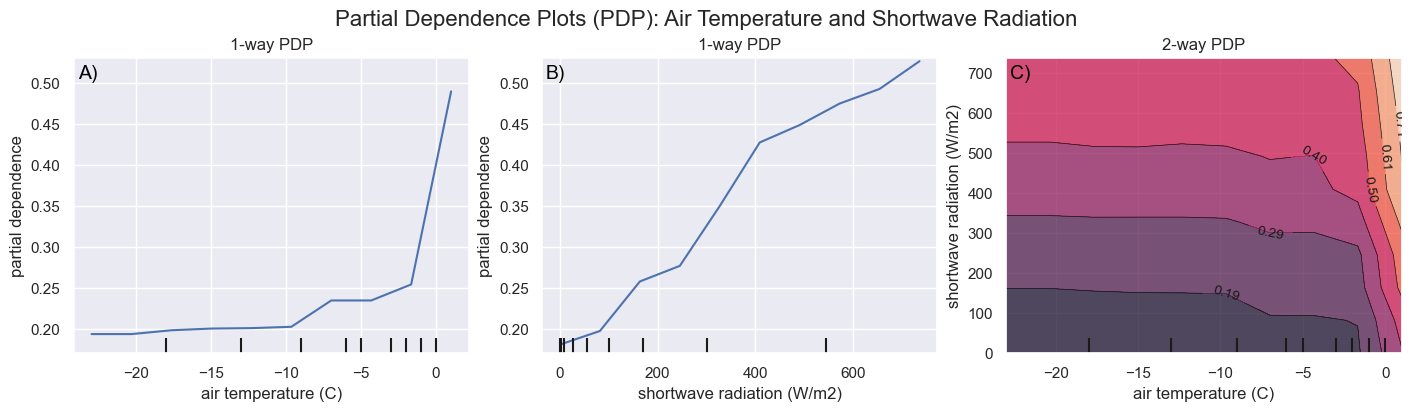

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 4), constrained_layout=True)

display = PartialDependenceDisplay.from_estimator(
    estimator=model,             # loaded model
    X=X_features,                # feature matrix used for training
    features=[nametemperature, nameshortwave, [nametemperature, nameshortwave]],
    kind=features_info["kind"],
    grid_resolution=10,   # reduce grid resolution for faster computation
    ax=ax
)

fig.suptitle("Partial Dependence Plots (PDP): Air Temperature and Shortwave Radiation", fontsize=16)
ax1, ax2, ax3 = ax
# ax1.set_title(f"1-way PDP: {nametemperature}")
# ax2.set_title(f"1-way PDP: {nameshortwave}")
# ax3.set_title(f"2-way PDP: {nametemperature} vs {nameshortwave}")

ax1.set_title("1-way PDP")
ax2.set_title("1-way PDP")
ax3.set_title("2-way PDP")

# set the ylimits for the 1-way PDPs to make them more comparable
ax1.set_ylim(0.17, 0.53)
ax2.set_ylim(0.17, 0.53)

# ax1.set_xlim(temperature_limits)
# ax2.set_xlim(shortwave_limits)

ax1.set_ylabel("partial dependence")
ax2.set_ylabel("partial dependence")

# add a A) B) C) label to the subplots
ax1.text(0.01, 0.93, 'A)', transform=ax1.transAxes, fontsize=14, color='black')
ax2.text(0.01, 0.93, 'B)', transform=ax2.transAxes, fontsize=14, color='black')
ax3.text(0.01, 0.93, 'C)', transform=ax3.transAxes, fontsize=14, color='black')

# save figure to file
# fig.savefig('/home/cassie/python/repos/unloading_regimes_analysis/figures/' + 'PDP_fullres_air_temperature_shortwave_radiation.png', dpi=500)

plt.show()

then temperature and wind speed

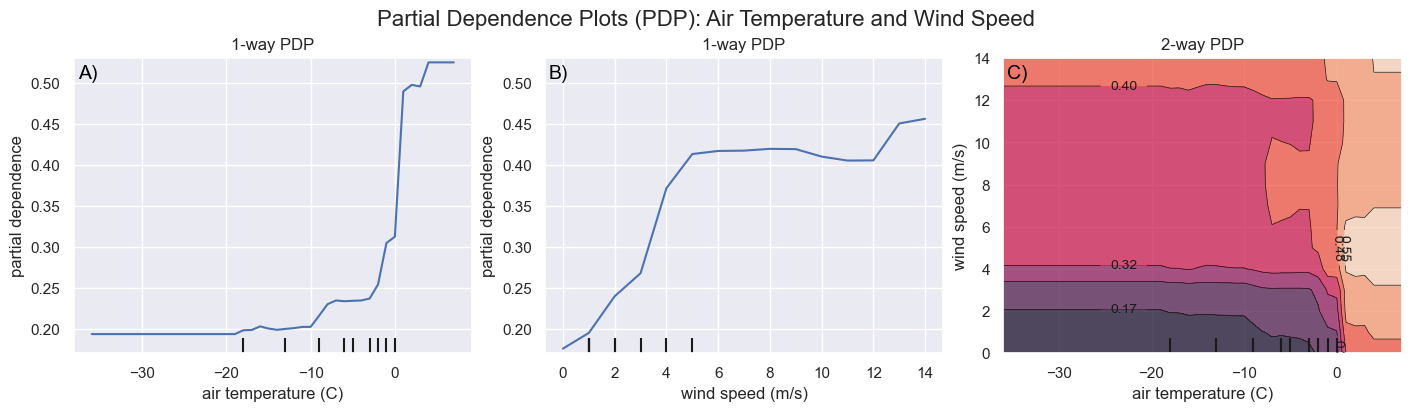

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 4), constrained_layout=True)

display = PartialDependenceDisplay.from_estimator(
    estimator=model,             # loaded model
    X=X_features,                # feature matrix used for training
    features=[nametemperature, namewindspeed, [nametemperature, namewindspeed]],
    kind=features_info["kind"],
    grid_resolution=10,   # reduce grid resolution for faster computation, make sure to turn this on when we are simply messing with the figure 
    ax=ax
)

fig.suptitle("Partial Dependence Plots (PDP): Air Temperature and Wind Speed", fontsize=16)
ax1, ax2, ax3 = ax

ax1.set_title("1-way PDP")
ax2.set_title("1-way PDP")
ax3.set_title("2-way PDP")

# set the ylimits for the 1-way PDPs to make them more comparable
ax1.set_ylim(0.17, 0.53)
ax2.set_ylim(0.17, 0.53)

ax1.set_ylabel("partial dependence")
ax2.set_ylabel("partial dependence")

# add a A) B) C) label to the subplots
ax1.text(0.01, 0.93, 'A)', transform=ax1.transAxes, fontsize=14, color='black')
ax2.text(0.01, 0.93, 'B)', transform=ax2.transAxes, fontsize=14, color='black')
ax3.text(0.01, 0.93, 'C)', transform=ax3.transAxes, fontsize=14, color='black')

# save figure to file
# fig.savefig('/home/cassie/python/repos/unloading_regimes_analysis/figures/' + 'PDP_fullres_air_temperature_wind_speed.png', dpi=500)

plt.show()

then shortwave and wind speed

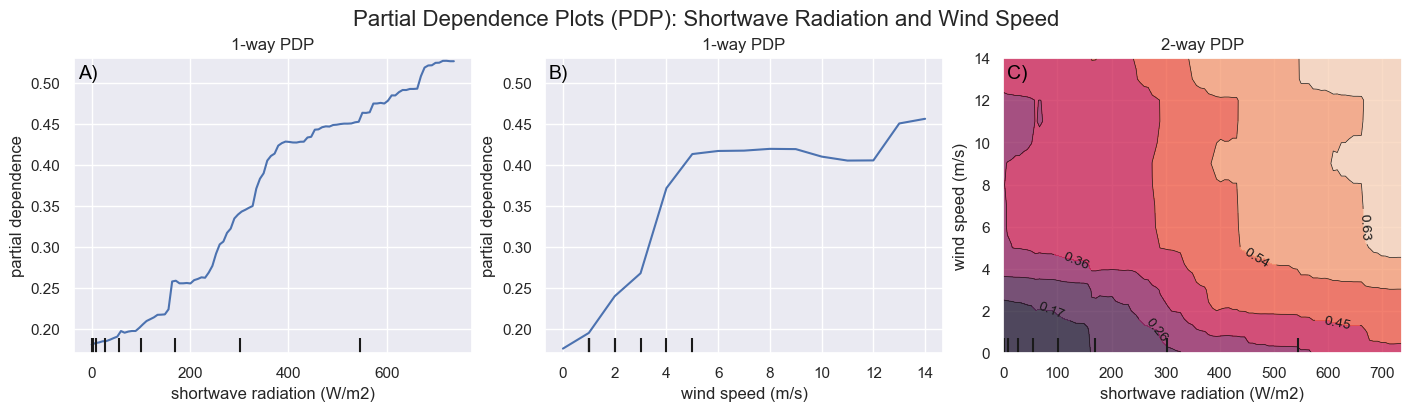

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 4), constrained_layout=True)

display = PartialDependenceDisplay.from_estimator(
    estimator=model,             # loaded model
    X=X_features,                # feature matrix used for training
    features=[nameshortwave, namewindspeed, [nameshortwave, namewindspeed]],
    kind=features_info["kind"],
    grid_resolution=10,   # reduce grid resolution for faster computation
    ax=ax
)

fig.suptitle("Partial Dependence Plots (PDP): Shortwave Radiation and Wind Speed", fontsize=16)
ax1, ax2, ax3 = ax

ax1.set_title("1-way PDP")
ax2.set_title("1-way PDP")
ax3.set_title("2-way PDP")

# set the ylimits for the 1-way PDPs to make them more comparable
ax1.set_ylim(0.17, 0.53)
ax2.set_ylim(0.17, 0.53)

ax1.set_ylabel("partial dependence")
ax2.set_ylabel("partial dependence")

# add a A) B) C) label to the subplots
ax1.text(0.01, 0.93, 'A)', transform=ax1.transAxes, fontsize=14, color='black')
ax2.text(0.01, 0.93, 'B)', transform=ax2.transAxes, fontsize=14, color='black')
ax3.text(0.01, 0.93, 'C)', transform=ax3.transAxes, fontsize=14, color='black')

# save figure to file
# fig.savefig('/home/cassie/python/repos/unloading_regimes_analysis/figures/' + 'PDP_fullres_shortwave_radiation_wind_speed.png', dpi=500)

plt.show()

### Subplots Together

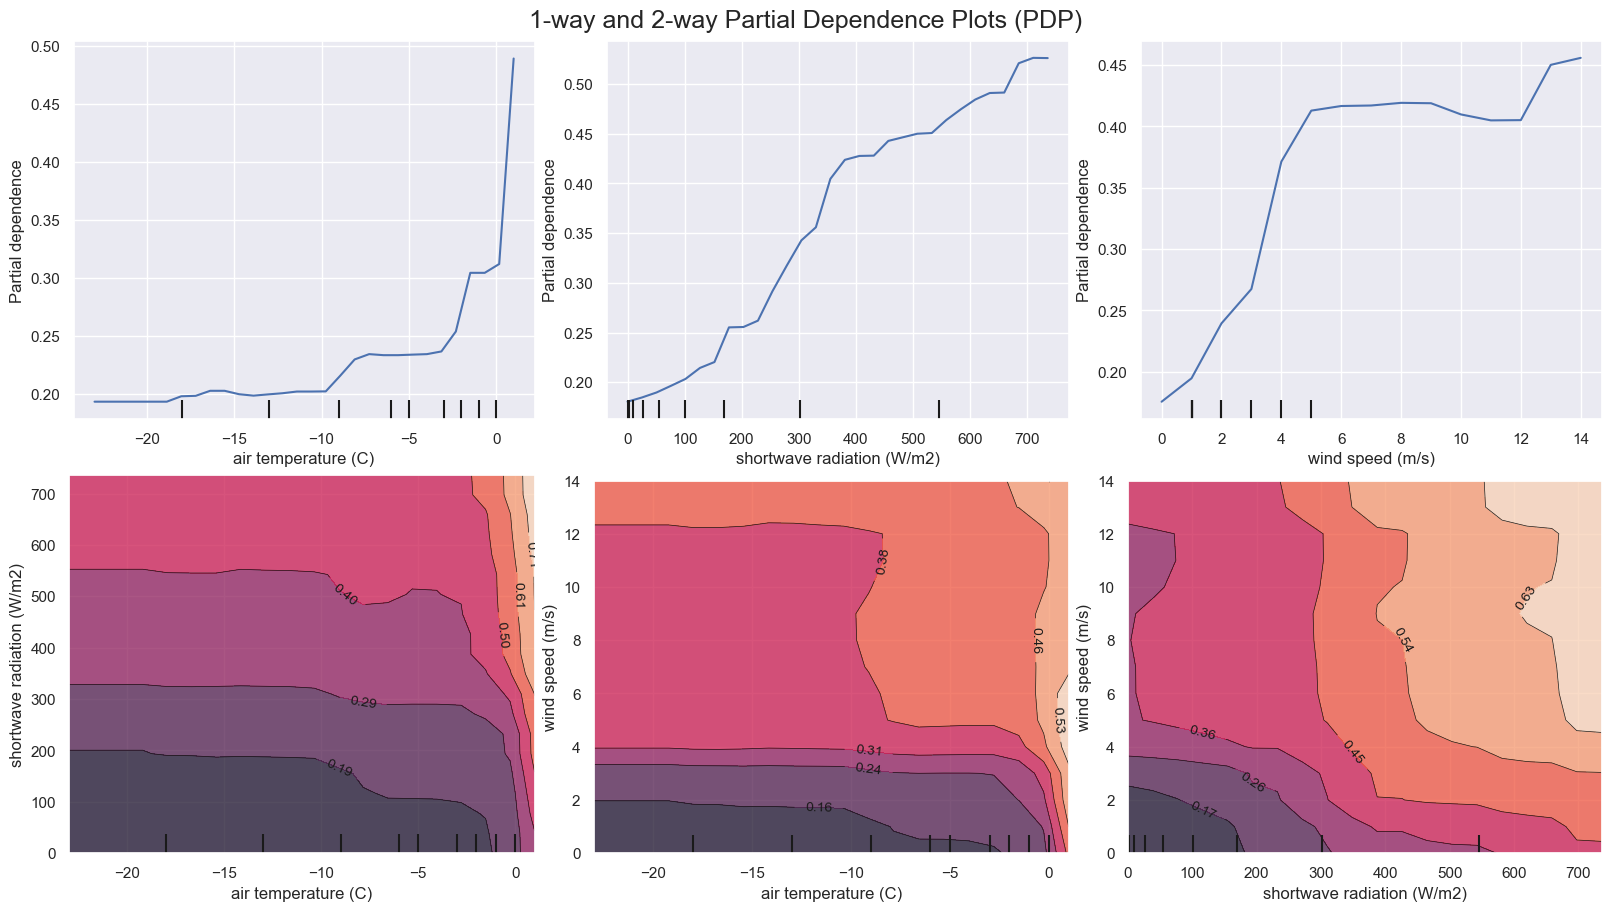

In [71]:
features_1way = [
    nametemperature,
    nameshortwave,
    namewindspeed,
]

features_2way = [
    [nametemperature, nameshortwave],
    [nametemperature, namewindspeed],
    [nameshortwave, namewindspeed],
]

# --- Create figure ----
fig, axes = plt.subplots(
    nrows=2, ncols=3,
    figsize=(16, 9),
    constrained_layout=True
)

# -----------------------------------
# Row 1: 1-way PDPs
# -----------------------------------
for i, feat in enumerate(features_1way):
    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,         
        features=[feat],
        kind="average",
        grid_resolution=30,
        ax=axes[0, i]
    )
    # axes[0, i].set_title(f"1-way PDP: {feat}")

# -----------------------------------
# Row 2: 2-way PDPs
# -----------------------------------
for i, feat_pair in enumerate(features_2way):
    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,         
        features=[feat_pair],
        kind="average",
        grid_resolution=20,    # lower for speed
        ax=axes[1, i]
    )
    # axes[1, i].set_title(f"2-way PDP: {feat_pair[0]} × {feat_pair[1]}")

# Overall figure title
fig.suptitle("1-way and 2-way Partial Dependence Plots (PDP)", fontsize=18)

# set the limits for the 1-way PDPs to make them more comparable
for ax in axes[0, :]:
    ax.set_ylim(0.1, 0.6)
    ax.set_ylabel("partial dependence")
    
    
# save figure to file
# fig.savefig('/home/cassie/python/repos/unloading_regimes_analysis/figures/' + 'PDP_fullres_combined.png', dpi=500)

plt.show()

NEW CODE

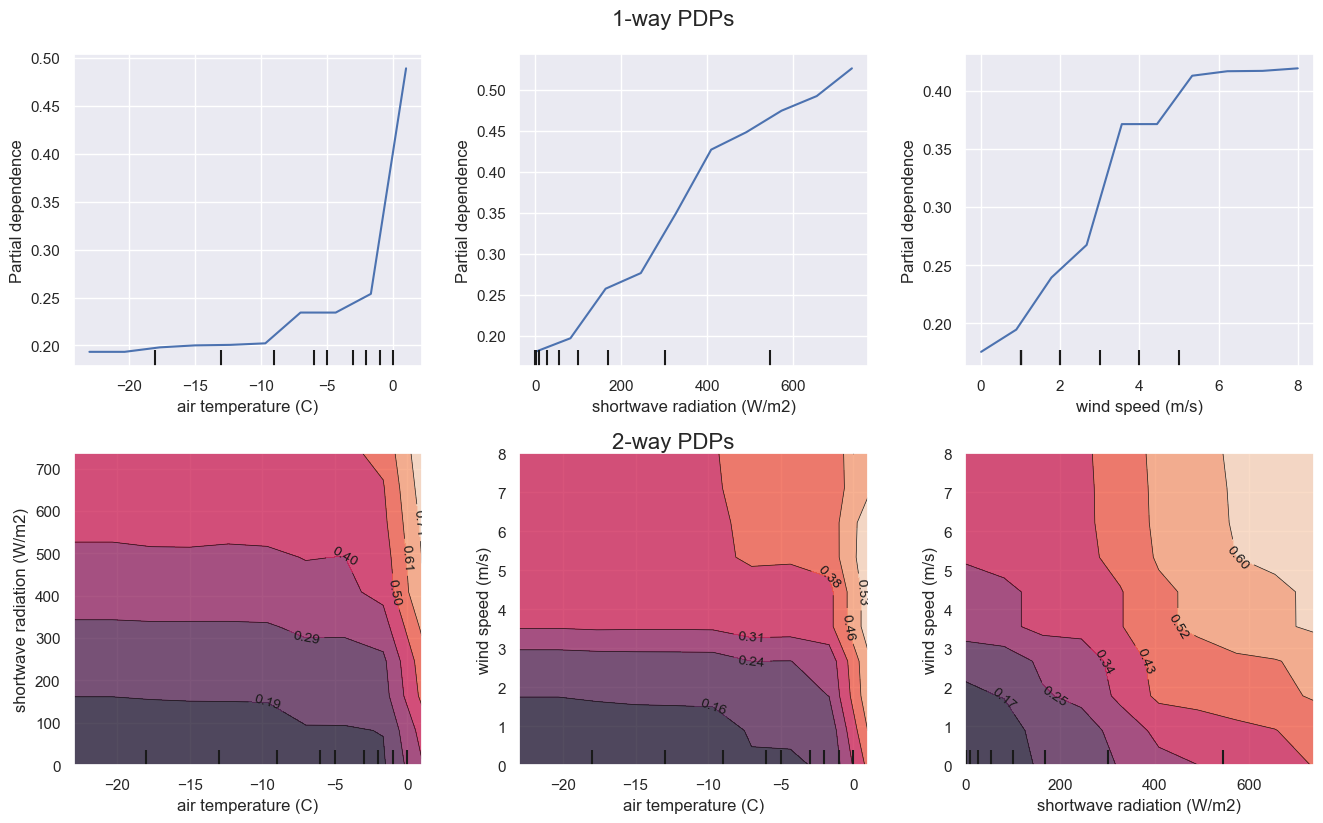

In [75]:
# ----------- User labels and feature names -----------
nametemperature_fig = "air temperature (℃)"
nameshortwave_fig   = "shortwave radiation (W m⁻²)"
namewindspeed_fig   = "wind speed (m s⁻¹)"

nametemperature = "air temperature (C)"
nameshortwave   = "shortwave radiation (W/m2)"
namewindspeed   = "wind speed (m/s)"

# Fixed axis limits for predictors
feature_limits = {
    nametemperature: (-25, 3),
    nameshortwave:   (0, 700),
    namewindspeed:   (0, 10),
}

# PDP limits
pdp_1d_ylim = (0.0, 0.5)
colorbar_limits = (0.0, 0.5)

# Grid resolution
grid_resolution_1d = 10
grid_resolution_2d = 10

# Features
features_1way = [
    (nametemperature, nametemperature_fig),
    (nameshortwave,   nameshortwave_fig),
    (namewindspeed,   namewindspeed_fig),
]

features_2way = [
    ([nametemperature, nameshortwave], (nametemperature_fig, nameshortwave_fig)),
    ([nametemperature, namewindspeed], (nametemperature_fig, namewindspeed_fig)),
    ([nameshortwave, namewindspeed],   (nameshortwave_fig, namewindspeed_fig)),
]

# ---------------- Create figure ----------------------
fig, axes = plt.subplots(
    nrows=2, ncols=3,
    figsize=(16, 9),
    sharey='row',    # share y-axis for row 1
    constrained_layout=False
)
plt.subplots_adjust(hspace=0.28, wspace=0.28, top=0.90)

axes_flat = axes.ravel()  # flatten for easy indexing

# ---------------- Row 1: 1-way PDPs -------------------
for i, (feat_raw, feat_label) in enumerate(features_1way):
    ax = axes_flat[i]
    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,
        features=[feat_raw],
        kind="average",
        grid_resolution=grid_resolution_1d,
        ax=ax
    )
    ax.set_xlabel(feat_label, fontsize=11)
    ax.set_ylabel("Partial dependence", fontsize=10)
    ax.set_ylim(*pdp_1d_ylim)
    if feat_raw in feature_limits:
        ax.set_xlim(*feature_limits[feat_raw])

# ---------------- Row 2: 2-way PDPs -------------------
mappables = []
for i, (feat_pair, feat_labels) in enumerate(features_2way):
    ax = axes_flat[3 + i]
    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,
        features=[feat_pair],
        kind="average",
        grid_resolution=grid_resolution_2d,
        ax=ax
    )
    ax.set_xlabel(feat_labels[0], fontsize=11)
    ax.set_ylabel(feat_labels[1], fontsize=11)

    # set axis limits for predictors
    x_raw, y_raw = feat_pair
    if x_raw in feature_limits:
        ax.set_xlim(*feature_limits[x_raw])
    if y_raw in feature_limits:
        ax.set_ylim(*feature_limits[y_raw])

    # --------- Detect 2D mappable for colorbar -----------
    for artist in ax.get_children():
        if isinstance(artist, matplotlib.collections.QuadMesh):
            mappables.append(artist)
            break
        if isinstance(artist, matplotlib.image.AxesImage):
            mappables.append(artist)
            break
        if isinstance(artist, matplotlib.contour.QuadContourSet):
            if artist.collections:
                mappables.append(artist.collections[0])
                break
        if isinstance(artist, matplotlib.collections.PolyCollection):
            try:
                _ = artist.get_array()
                mappables.append(artist)
                break
            except Exception:
                continue

# ---------------- Shared colorbar ----------------------
if mappables:
    vmin, vmax = colorbar_limits
    for mp in mappables:
        try:
            if hasattr(mp, "set_clim"):
                mp.set_clim(vmin, vmax)
        except Exception:
            continue
    cbar = fig.colorbar(mappables[0], ax=axes[1, :], orientation="vertical",
                        fraction=0.05, pad=0.03)
    cbar.set_label("Partial dependence (class=1 probability)", fontsize=11)
    cbar.set_ticks(np.linspace(vmin, vmax, 6))
else:
    print("Warning: no 2-D PDP detected. Colorbar not added.")

# ---------------- Row titles --------------------------
fig.text(0.5, 0.95, "1-way PDPs", ha='center', va='top', fontsize=16)
fig.text(0.5, 0.48, "2-way PDPs", ha='center', va='top', fontsize=16)

# ---------------- Panel labels A)-F) -------------------
panel_labels = ["A", "B", "C", "D", "E", "F"]
for ax, lab in zip(axes_flat, panel_labels):
    ax.text(0.02, 0.98, f"{lab})",
            transform=ax.transAxes,
            fontsize=13,
            fontweight='bold',
            color='gray',
            ha='left', va='top',
            zorder=1000,
            clip_on=False)

plt.show()

Something is really not working here with the axis. I'll have to come back to this.

Clean up the formatting a bit....

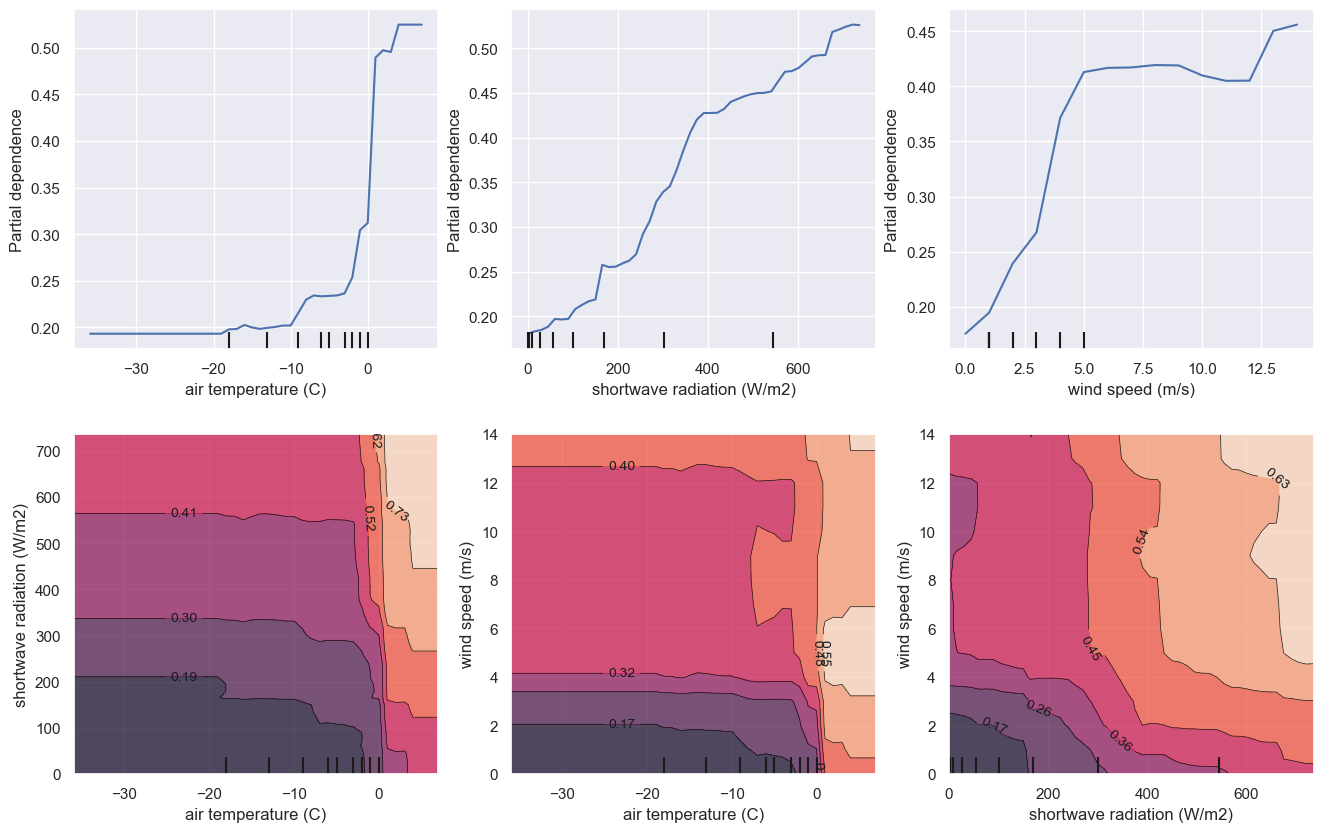

In [76]:
# axis labels
nametemperature_fig = "air temperature (℃)"
nameshortwave_fig = "shortwave radiation (W m⁻²)"
namewindspeed_fig = "wind speed (m s⁻¹)"

# Names as they appear in X_features:
nametemperature = "air temperature (C)"
nameshortwave = "shortwave radiation (W/m2)"
namewindspeed = "wind speed (m/s)"

# 1-way and 2-way feature sets
features_1way = [
    (nametemperature, nametemperature_fig),
    (nameshortwave, nameshortwave_fig),
    (namewindspeed, namewindspeed_fig),
]

features_2way = [
    ([nametemperature, nameshortwave],  (nametemperature_fig, nameshortwave_fig)),
    ([nametemperature, namewindspeed],  (nametemperature_fig, namewindspeed_fig)),
    ([nameshortwave, namewindspeed],    (nameshortwave_fig, namewindspeed_fig)),
]

# ---- Create figure ----
fig, axes = plt.subplots(
    nrows=2, ncols=3,
    figsize=(16, 9),
    constrained_layout=False
)

# Share only the first row's y-axis
for j in range(1, 3):
    axes[0, j].sharey(axes[0, 0])

# Adjust spacing manually for row titles
plt.subplots_adjust(hspace=0.25, top=0.92, bottom=0.07)

grid_resolution = 50 # want to remove this, or increase to 50 or 100 for the final figure 

# ---------------------------------------------------
# Row 1 — 1-way PDPs
# ---------------------------------------------------
for i, (feat_raw, feat_label) in enumerate(features_1way):
    disp = PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,
        features=[feat_raw],
        kind="average",
        grid_resolution=grid_resolution,
        ax=axes[0, i]
    )
    axes[0, i].set_xlabel(feat_label)
    axes[0, i].set_title("")  # remove per-panel titles

# ---------------------------------------------------
# Row 2 — 2-way PDPs
# ---------------------------------------------------
for i, (feat_raw, feat_labels) in enumerate(features_2way):
    disp = PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_features,
        features=[feat_raw],
        kind="average",
        grid_resolution=grid_resolution,
        ax=axes[1, i]
    )
    # Set axis labels for 2-way PDP
    axes[1, i].set_xlabel(feat_labels[0])
    axes[1, i].set_ylabel(feat_labels[1])
    axes[1, i].set_title("")

# ---------------------------------------------------
# Row titles
# ---------------------------------------------------
# axes[0, 0].set_title("1-way PDPs", fontsize=16, pad=15, loc='left')
# axes[1, 0].set_title("2-way PDPs", fontsize=16, pad=15, loc='left')

# ---------------------------------------------------
# Panel Labels (A, B, C, D, E, F)
# ---------------------------------------------------
panel_labels = ["A", "B", "C", "D", "E", "F"]

for ax, label in zip(axes.ravel(), panel_labels):
    ax.text(
        0.02, 0.95, f"{label})",
        transform=ax.transAxes,
        fontsize=13,
        fontweight='bold',
        color='gray',
        ha='left', va='top'
    )
    

# set limits on the y-axis for the 1-way PDPs to make them more comparable
axes[0, 0].set_ylim(0.1, 0.6)
axes[0, 1].set_ylim(0.1, 0.6)
axes[0, 2].set_ylim(0.1, 0.6)

# label on the y-axis 
axes[0, 0].set_ylabel("partial dependence")
axes[0, 1].set_ylabel("partial dependence")
axes[0, 2].set_ylabel("partial dependence")

plt.show()

# Trying to make a 2-way PDP with different temperature boxes

Cold rows: 1260, Warm rows: 390


Note: could not extract grid arrays for difference plot automatically: 'values'


/home/cassie/programs/miniforge3/envs/randomforest/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


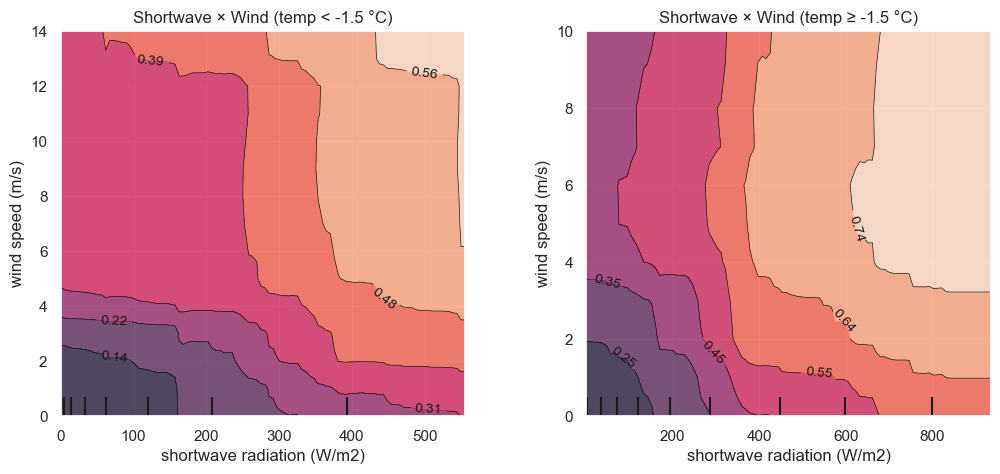

In [18]:
# Feature names in your dataframe
nametemperature = "air temperature (C)"
nameshortwave   = "shortwave radiation (W/m2)"
namewindspeed   = "wind speed (m/s)"

# Pretty axis labels
nameshortwave_fig = "shortwave radiation (W m⁻²)"
namewindspeed_fig = "wind speed (m s⁻¹)"
nametemperature_fig = "air temperature (℃)"

# Choose threshold (physics-based)
threshold =  0.0  # deg C; change if you prefer percentiles
threshold = -1.5  # deg C; change if you prefer percentiles

# Optionally, downsample subsets for speed
# max_samples = 10000  # set None to use full subset
max_samples = None  # set None to use full subset

# grid resolution for PDP (increase for final figure)
grid_res = 100

# Fixed axis limits
sw_lim = (0, 700)
wind_lim = (0, 10)

# Create subsets
mask_cold = X_features[nametemperature] < threshold
mask_warm = X_features[nametemperature] >= threshold

X_cold = X_features.loc[mask_cold]
X_warm = X_features.loc[mask_warm]

# optionally downsample
if max_samples and len(X_cold) > max_samples:
    X_cold_plot = X_cold.sample(max_samples, random_state=42)
else:
    X_cold_plot = X_cold

if max_samples and len(X_warm) > max_samples:
    X_warm_plot = X_warm.sample(max_samples, random_state=42)
else:
    X_warm_plot = X_warm

print(f"Cold rows: {len(X_cold_plot)}, Warm rows: {len(X_warm_plot)}")

# Prepare figure: two panels side-by-side
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), constrained_layout=False)
plt.subplots_adjust(wspace=0.3, top=0.88)

# Run PDP for cold subset
ax = axes[0]
disp_cold = PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_cold_plot,
    features=[ [nameshortwave, namewindspeed] ],
    kind="average",
    grid_resolution=grid_res,
    ax=ax
)
ax.set_title(f"Shortwave × Wind (temp < {threshold} °C)", fontsize=12)
ax.set_xlabel(nameshortwave_fig)
ax.set_ylabel(namewindspeed_fig)
# ax.set_xlim(*sw_lim)
# ax.set_ylim(*wind_lim)

ax.set_xlim(sw_lim)
ax.set_ylim(wind_lim)

# Run PDP for warm subset
ax = axes[1]
disp_warm = PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_warm_plot,
    features=[ [nameshortwave, namewindspeed] ],
    kind="average",
    grid_resolution=grid_res,
    ax=ax
)
ax.set_title(f"Shortwave × Wind (temp ≥ {threshold} °C)", fontsize=12)
ax.set_xlabel(nameshortwave_fig)
ax.set_ylabel("")  # only left panel needs y label visually
# ax.set_xlim(*sw_lim)
# ax.set_ylim(*wind_lim)

ax.set_xlim(sw_lim)
ax.set_ylim(wind_lim)

# --- Robust mappable detection (works for QuadMesh, contour, AxesImage) ---
def find_mappable(ax):
    import matplotlib
    for artist in ax.get_children():
        if isinstance(artist, matplotlib.collections.QuadMesh):
            return artist
        if isinstance(artist, matplotlib.image.AxesImage):
            return artist
        if isinstance(artist, matplotlib.contour.QuadContourSet):
            if artist.collections:
                return artist.collections[0]
        if isinstance(artist, matplotlib.collections.PolyCollection):
            try:
                _ = artist.get_array()
                return artist
            except Exception:
                continue
    # fallback: check ax.images and ax.collections lists
    if getattr(ax, "images", None):
        for im in ax.images:
            if hasattr(im, "get_array"):
                return im
    if getattr(ax, "collections", None):
        for coll in ax.collections:
            if hasattr(coll, "get_array"):
                return coll
    return None

m_cold = find_mappable(axes[0])
m_warm = find_mappable(axes[1])

if m_cold is None or m_warm is None:
    print("Warning: could not find 2D mappable for one or both panels. PDP may have produced lines instead of surfaces.")
else:
    # enforce shared vmin/vmax (use fixed range or auto)
    # Option A: fixed 0-0.5
    vmin, vmax = 0.0, 0.5

    # Option B: automatic from both arrays (comment out if you prefer fixed)
    # arrs = []
    # for m in (m_cold, m_warm):
    #     try:
    #         arrs.append(np.asarray(m.get_array()).ravel())
    #     except Exception:
    #         pass
    # allvals = np.concatenate(arrs)
    # vmin, vmax = float(np.nanmin(allvals)), float(np.nanmax(allvals))

    # apply clim
    for mp in (m_cold, m_warm):
        try:
            if hasattr(mp, "set_clim"):
                mp.set_clim(vmin, vmax)
            else:
                # fallback norm
                mp.set_norm(matplotlib.colors.Normalize(vmin=vmin, vmax=vmax))
        except Exception:
            pass

    # add shared colorbar on the right of both axes
    cbar = fig.colorbar(m_cold, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.05, pad=0.02)
    cbar.set_label("Predicted probability (class = 1)")

# Optional: difference plot (warm - cold)
# If you want to visualize where model predictions change most between temp regimes,
# you can compute the PDP grid arrays manually from disp objects (if available).
try:
    Z_cold = disp_cold.pd_results[0]["values"]   # 2D array (grid for cold)
    Z_warm = disp_warm.pd_results[0]["values"]   # 2D array (grid for warm)
    # Note: ordering of axes in values is [x_values, y_values] depending on sklearn version.
    # Calculate difference
    Zdiff = Z_warm - Z_cold
    # Create a third small subplot for the difference if you want
    fig2, axd = plt.subplots(figsize=(6,5))
    # create pcolormesh using the grid coordinates
    x_grid = disp_cold.pd_results[0]["grid"][0]   # feature 0 grid
    y_grid = disp_cold.pd_results[0]["grid"][1]   # feature 1 grid
    Xg, Yg = np.meshgrid(x_grid, y_grid)
    im = axd.pcolormesh(Xg, Yg, Zdiff.T, shading='auto', cmap='bwr', vmin=-0.5, vmax=0.5)
    axd.set_xlabel(nameshortwave_fig)
    axd.set_ylabel(namewindspeed_fig)
    axd.set_title("Warm − Cold predicted probability")
    fig2.colorbar(im, ax=axd, label='Δ predicted prob (class=1)')
    plt.show()
except Exception as e:
    # safe fail: pd_results may have different structure depending on sklearn
    # If pd_results not present, you can compute partial_dependence with sklearn.inspection.partial_dependence
    # or manually evaluate model.predict_proba() on a shortwave×wind grid while fixing temperature subset values.
    print("Note: could not extract grid arrays for difference plot automatically:", e)

plt.show()

trying with a different thresholds,

Cold rows: 1385, Warm rows: 265
Note: could not extract grid arrays for difference plot automatically: 'values'


/home/cassie/programs/miniforge3/envs/randomforest/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


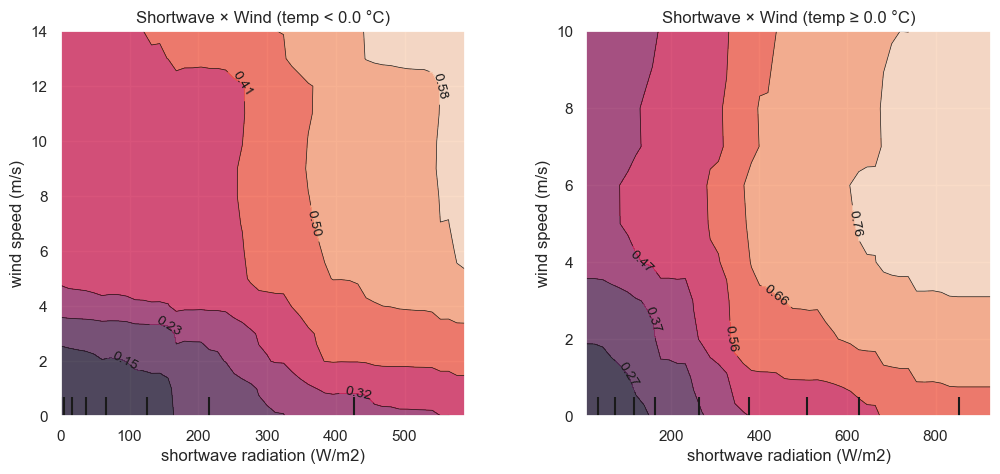

In [16]:
# Feature names in your dataframe
nametemperature = "air temperature (C)"
nameshortwave   = "shortwave radiation (W/m2)"
namewindspeed   = "wind speed (m/s)"

# Pretty axis labels
nameshortwave_fig = "shortwave radiation (W m⁻²)"
namewindspeed_fig = "wind speed (m s⁻¹)"
nametemperature_fig = "air temperature (℃)"

# Choose threshold (physics-based)
threshold =  0.0  # deg C; change if you prefer percentiles
# threshold = -1.5  # deg C; change if you prefer percentiles

# Optionally, downsample subsets for speed
# max_samples = 10000  # set None to use full subset
max_samples = None  # set None to use full subset

# grid resolution for PDP (increase for final figure)
grid_res = 50

# Fixed axis limits
sw_lim = (0, 700)
wind_lim = (0, 10)

# Create subsets
mask_cold = X_features[nametemperature] < threshold
mask_warm = X_features[nametemperature] >= threshold

X_cold = X_features.loc[mask_cold]
X_warm = X_features.loc[mask_warm]

# optionally downsample
if max_samples and len(X_cold) > max_samples:
    X_cold_plot = X_cold.sample(max_samples, random_state=42)
else:
    X_cold_plot = X_cold

if max_samples and len(X_warm) > max_samples:
    X_warm_plot = X_warm.sample(max_samples, random_state=42)
else:
    X_warm_plot = X_warm

print(f"Cold rows: {len(X_cold_plot)}, Warm rows: {len(X_warm_plot)}")

# Prepare figure: two panels side-by-side
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), constrained_layout=False)
plt.subplots_adjust(wspace=0.3, top=0.88)

# Run PDP for cold subset
ax = axes[0]
disp_cold = PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_cold_plot,
    features=[ [nameshortwave, namewindspeed] ],
    kind="average",
    grid_resolution=grid_res,
    ax=ax
)
ax.set_title(f"Shortwave × Wind (temp < {threshold} °C)", fontsize=12)
ax.set_xlabel(nameshortwave_fig)
ax.set_ylabel(namewindspeed_fig)
# ax.set_xlim(*sw_lim)
# ax.set_ylim(*wind_lim)

ax.set_xlim(sw_lim)
ax.set_ylim(wind_lim)

# Run PDP for warm subset
ax = axes[1]
disp_warm = PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_warm_plot,
    features=[ [nameshortwave, namewindspeed] ],
    kind="average",
    grid_resolution=grid_res,
    ax=ax
)
ax.set_title(f"Shortwave × Wind (temp ≥ {threshold} °C)", fontsize=12)
ax.set_xlabel(nameshortwave_fig)
ax.set_ylabel("")  # only left panel needs y label visually
# ax.set_xlim(*sw_lim)
# ax.set_ylim(*wind_lim)

ax.set_xlim(sw_lim)
ax.set_ylim(wind_lim)

# --- Robust mappable detection (works for QuadMesh, contour, AxesImage) ---
def find_mappable(ax):
    import matplotlib
    for artist in ax.get_children():
        if isinstance(artist, matplotlib.collections.QuadMesh):
            return artist
        if isinstance(artist, matplotlib.image.AxesImage):
            return artist
        if isinstance(artist, matplotlib.contour.QuadContourSet):
            if artist.collections:
                return artist.collections[0]
        if isinstance(artist, matplotlib.collections.PolyCollection):
            try:
                _ = artist.get_array()
                return artist
            except Exception:
                continue
    # fallback: check ax.images and ax.collections lists
    if getattr(ax, "images", None):
        for im in ax.images:
            if hasattr(im, "get_array"):
                return im
    if getattr(ax, "collections", None):
        for coll in ax.collections:
            if hasattr(coll, "get_array"):
                return coll
    return None

m_cold = find_mappable(axes[0])
m_warm = find_mappable(axes[1])

if m_cold is None or m_warm is None:
    print("Warning: could not find 2D mappable for one or both panels. PDP may have produced lines instead of surfaces.")
else:
    # enforce shared vmin/vmax (use fixed range or auto)
    # Option A: fixed 0-0.5
    vmin, vmax = 0.0, 0.5

    # Option B: automatic from both arrays (comment out if you prefer fixed)
    # arrs = []
    # for m in (m_cold, m_warm):
    #     try:
    #         arrs.append(np.asarray(m.get_array()).ravel())
    #     except Exception:
    #         pass
    # allvals = np.concatenate(arrs)
    # vmin, vmax = float(np.nanmin(allvals)), float(np.nanmax(allvals))

    # apply clim
    for mp in (m_cold, m_warm):
        try:
            if hasattr(mp, "set_clim"):
                mp.set_clim(vmin, vmax)
            else:
                # fallback norm
                mp.set_norm(matplotlib.colors.Normalize(vmin=vmin, vmax=vmax))
        except Exception:
            pass

    # add shared colorbar on the right of both axes
    cbar = fig.colorbar(m_cold, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.05, pad=0.02)
    cbar.set_label("Predicted probability (class = 1)")

# Optional: difference plot (warm - cold)
# If you want to visualize where model predictions change most between temp regimes,
# you can compute the PDP grid arrays manually from disp objects (if available).
try:
    Z_cold = disp_cold.pd_results[0]["values"]   # 2D array (grid for cold)
    Z_warm = disp_warm.pd_results[0]["values"]   # 2D array (grid for warm)
    # Note: ordering of axes in values is [x_values, y_values] depending on sklearn version.
    # Calculate difference
    Zdiff = Z_warm - Z_cold
    # Create a third small subplot for the difference if you want
    fig2, axd = plt.subplots(figsize=(6,5))
    # create pcolormesh using the grid coordinates
    x_grid = disp_cold.pd_results[0]["grid"][0]   # feature 0 grid
    y_grid = disp_cold.pd_results[0]["grid"][1]   # feature 1 grid
    Xg, Yg = np.meshgrid(x_grid, y_grid)
    im = axd.pcolormesh(Xg, Yg, Zdiff.T, shading='auto', cmap='bwr', vmin=-0.5, vmax=0.5)
    axd.set_xlabel(nameshortwave_fig)
    axd.set_ylabel(namewindspeed_fig)
    axd.set_title("Warm − Cold predicted probability")
    fig2.colorbar(im, ax=axd, label='Δ predicted prob (class=1)')
    plt.show()
except Exception as e:
    # safe fail: pd_results may have different structure depending on sklearn
    # If pd_results not present, you can compute partial_dependence with sklearn.inspection.partial_dependence
    # or manually evaluate model.predict_proba() on a shortwave×wind grid while fixing temperature subset values.
    print("Note: could not extract grid arrays for difference plot automatically:", e)

plt.show()

Cold rows: 1385, Warm rows: 265
Note: could not extract grid arrays for difference plot automatically: 'values'


/home/cassie/programs/miniforge3/envs/randomforest/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


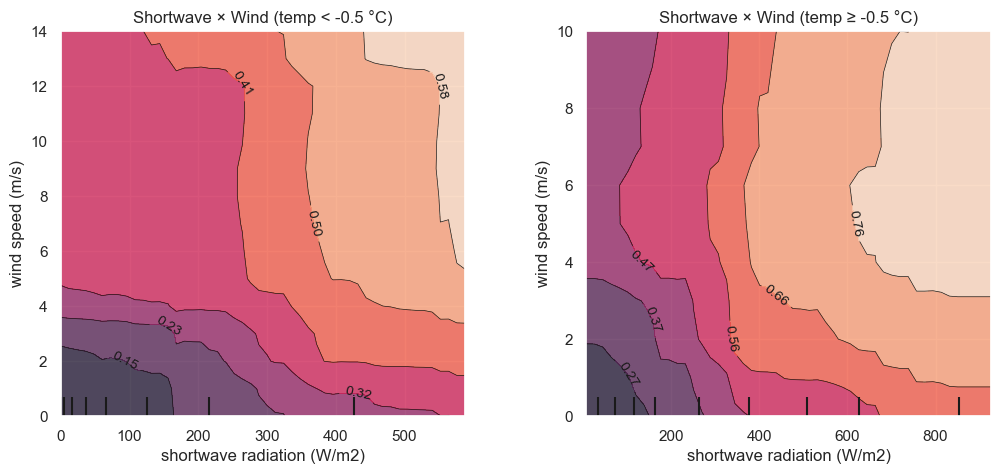

In [ ]:
# Feature names in your dataframe
nametemperature = "air temperature (C)"
nameshortwave   = "shortwave radiation (W/m2)"
namewindspeed   = "wind speed (m/s)"

# Pretty axis labels
nameshortwave_fig = "shortwave radiation (W m⁻²)"
namewindspeed_fig = "wind speed (m s⁻¹)"
nametemperature_fig = "air temperature (℃)"

# Choose threshold (physics-based)
threshold =  -0.5  # deg C; change if you prefer percentiles
# threshold = -1.5  # deg C; change if you prefer percentiles

# Optionally, downsample subsets for speed
# max_samples = 10000  # set None to use full subset
max_samples = None  # set None to use full subset

# grid resolution for PDP (increase for final figure)
grid_res = 50

# Fixed axis limits
sw_lim = (0, 700)
wind_lim = (0, 10)

# Create subsets
mask_cold = X_features[nametemperature] < threshold
mask_warm = X_features[nametemperature] >= threshold

X_cold = X_features.loc[mask_cold]
X_warm = X_features.loc[mask_warm]

# optionally downsample
if max_samples and len(X_cold) > max_samples:
    X_cold_plot = X_cold.sample(max_samples, random_state=42)
else:
    X_cold_plot = X_cold

if max_samples and len(X_warm) > max_samples:
    X_warm_plot = X_warm.sample(max_samples, random_state=42)
else:
    X_warm_plot = X_warm

print(f"Cold rows: {len(X_cold_plot)}, Warm rows: {len(X_warm_plot)}")

# Prepare figure: two panels side-by-side
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), constrained_layout=False)
plt.subplots_adjust(wspace=0.3, top=0.88)

# Run PDP for cold subset
ax = axes[0]
disp_cold = PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_cold_plot,
    features=[ [nameshortwave, namewindspeed] ],
    kind="average",
    grid_resolution=grid_res,
    ax=ax
)
ax.set_title(f"Shortwave × Wind (temp < {threshold} °C)", fontsize=12)
ax.set_xlabel(nameshortwave_fig)
ax.set_ylabel(namewindspeed_fig)
# ax.set_xlim(*sw_lim)
# ax.set_ylim(*wind_lim)

ax.set_xlim(sw_lim)
ax.set_ylim(wind_lim)

# Run PDP for warm subset
ax = axes[1]
disp_warm = PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_warm_plot,
    features=[ [nameshortwave, namewindspeed] ],
    kind="average",
    grid_resolution=grid_res,
    ax=ax
)
ax.set_title(f"Shortwave × Wind (temp ≥ {threshold} °C)", fontsize=12)
ax.set_xlabel(nameshortwave_fig)
ax.set_ylabel("")  # only left panel needs y label visually
# ax.set_xlim(*sw_lim)
# ax.set_ylim(*wind_lim)

ax.set_xlim(sw_lim)
ax.set_ylim(wind_lim)

# --- Robust mappable detection (works for QuadMesh, contour, AxesImage) ---
def find_mappable(ax):
    import matplotlib
    for artist in ax.get_children():
        if isinstance(artist, matplotlib.collections.QuadMesh):
            return artist
        if isinstance(artist, matplotlib.image.AxesImage):
            return artist
        if isinstance(artist, matplotlib.contour.QuadContourSet):
            if artist.collections:
                return artist.collections[0]
        if isinstance(artist, matplotlib.collections.PolyCollection):
            try:
                _ = artist.get_array()
                return artist
            except Exception:
                continue
    # fallback: check ax.images and ax.collections lists
    if getattr(ax, "images", None):
        for im in ax.images:
            if hasattr(im, "get_array"):
                return im
    if getattr(ax, "collections", None):
        for coll in ax.collections:
            if hasattr(coll, "get_array"):
                return coll
    return None

m_cold = find_mappable(axes[0])
m_warm = find_mappable(axes[1])

if m_cold is None or m_warm is None:
    print("Warning: could not find 2D mappable for one or both panels. PDP may have produced lines instead of surfaces.")
else:
    # enforce shared vmin/vmax (use fixed range or auto)
    # Option A: fixed 0-0.5
    vmin, vmax = 0.0, 0.5

    # Option B: automatic from both arrays (comment out if you prefer fixed)
    # arrs = []
    # for m in (m_cold, m_warm):
    #     try:
    #         arrs.append(np.asarray(m.get_array()).ravel())
    #     except Exception:
    #         pass
    # allvals = np.concatenate(arrs)
    # vmin, vmax = float(np.nanmin(allvals)), float(np.nanmax(allvals))

    # apply clim
    for mp in (m_cold, m_warm):
        try:
            if hasattr(mp, "set_clim"):
                mp.set_clim(vmin, vmax)
            else:
                # fallback norm
                mp.set_norm(matplotlib.colors.Normalize(vmin=vmin, vmax=vmax))
        except Exception:
            pass

    # add shared colorbar on the right of both axes
    cbar = fig.colorbar(m_cold, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.05, pad=0.02)
    cbar.set_label("Predicted probability (class = 1)")

# Optional: difference plot (warm - cold)
# If you want to visualize where model predictions change most between temp regimes,
# you can compute the PDP grid arrays manually from disp objects (if available).
try:
    Z_cold = disp_cold.pd_results[0]["values"]   # 2D array (grid for cold)
    Z_warm = disp_warm.pd_results[0]["values"]   # 2D array (grid for warm)
    # Note: ordering of axes in values is [x_values, y_values] depending on sklearn version.
    # Calculate difference
    Zdiff = Z_warm - Z_cold
    # Create a third small subplot for the difference if you want
    fig2, axd = plt.subplots(figsize=(6,5))
    # create pcolormesh using the grid coordinates
    x_grid = disp_cold.pd_results[0]["grid"][0]   # feature 0 grid
    y_grid = disp_cold.pd_results[0]["grid"][1]   # feature 1 grid
    Xg, Yg = np.meshgrid(x_grid, y_grid)
    im = axd.pcolormesh(Xg, Yg, Zdiff.T, shading='auto', cmap='bwr', vmin=-0.5, vmax=0.5)ok bb
    axd.set_xlabel(nameshortwave_fig)
    axd.set_ylabel(namewindspeed_fig)
    axd.set_title("Warm − Cold predicted probability")
    fig2.colorbar(im, ax=axd, label='Δ predicted prob (class=1)')
    plt.show()
except Exception as e:
    # safe fail: pd_results may have different structure depending on sklearn
    # If pd_results not present, you can compute partial_dependence with sklearn.inspection.partial_dependence
    # or manually evaluate model.predict_proba() on a shortwave×wind grid while fixing temperature subset values.
    print("Note: could not extract grid arrays for difference plot automatically:", e)

plt.show()